In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# ETAPE 1

# définition des parametres : pour tester les fonctions, on prendra n2 = 5

# n = nombre de données d'apprentissage 
# n2 = nombres de neurones dans la 2eme couche
# eta = pas dans la méthode du gradient à pas fixe (= learning rate)
# Niter = nombre d'itérations dans la méthode du gradient à pas fixe

n = 100
n2 = 5
eta = 0.3 #learning rate
Nepoch = 6000

In [3]:
# ETAPE 2

# génération des données d'apprentissage

X = np.linspace(0,1,n).reshape(1,n)
y = np.sin(2*np.pi*X)

In [4]:
np.shape(X)
np.shape(y)

(1, 100)

In [5]:
# ETAPE 3

# Fonction d'activation
def sigma(z):
    return 1/(1+np.exp(-z))

# Dérivée de la fonction d'activation
def sigmaprime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [6]:
# ETAPE 4

# Initialisation matrices poids et vecteurs biais du réseau de neurones

W2 = np.random.randn(n2,1)
b2 = np.random.randn(n2,1)

W3 = np.random.randn(1,n2)
b3 = np.random.randn(1)


In [7]:
# ETAPE 5

# Calcul de dC/dW2, dC/dW3, dC/db2 et dC/db3 en utilisant
# la méthode de backpropagation

def backpropagation(x,y,W2,W3,b2,b3):
    a1 = x
    # Calculer et stocker
    z2 = np.dot(W2,a1) + b2
    a2 = sigma(z2)

    z3 = np.dot(W3,a2) + b3
    a3 = z3

    #C = np.mean((a3 - y)**2)*0.5
    # Calcul
    delta3 = (a3-y)
    # Calcul
    delta2 = np.dot(W3.T,delta3)*sigmaprime(z2)
    
    dCdW2 = np.dot(delta2,a1.T)
    #dCdW2 = dCdW2.T
    dCdW3 = np.dot(delta3,a2.T)
    #dCdW3 = dCdW2.T
    dCdb2 = delta2
    dCdb3 = delta3

    return dCdW2, dCdW3, dCdb2, dCdb3

In [8]:
# Test de la fonction compute_grad:
# Pour tester, on prendra les matrices suivantes:

W2 = np.array([[0.1],[0.2],[0.7],[0.9],[0.1]])
b2 = np.array([[0.4],[0.5],[0.3],[0.8],[0.2]])

W3 = np.array([[0.4, 0.6, 0.8, 0.7, 0.2]])
b3 = np.array([[2.5]])

xi = np.array([[0.3]])
yi = np.sin(2*np.pi*xi)

dCdW2, dCdW3, dCdb2, dCdb3 = backpropagation(xi,yi,W2,W3,b2,b3)

# Vous devez trouver les résultats suivants:
print('dCdW2=')
print(dCdW2)
print('')
print('dCdW3=')
print(dCdW3)
print('')
print('dCdb2=')
print(dCdb2)
print('')
print('dCdb3=')
print(dCdb3)

dCdW2=
[[0.09472382]
 [0.13767658]
 [0.18598269]
 [0.13201616]
 [0.04893513]]

dCdW3=
[[2.00282269 2.10390657 2.06540843 2.46139695 1.84208145]]

dCdb2=
[[0.31574606]
 [0.45892193]
 [0.6199423 ]
 [0.44005386]
 [0.1631171 ]]

dCdb3=
[[3.30567707]]


In [9]:
# ETAPE 6

# Définition de la fonction coût

def cost(y,y_pred):
    return (1/2*n)* np.linalg.norm(y-y_pred)

In [10]:
# ETAPE 7

# Prediction du modèle

def model_predict(X,W2,W3,b2,b3):
    a1 = X
    # Calculer et stocker
    z2 = W2@a1 + b2
    a2 = sigma(z2)

    z3 = W3@a2 + b3
    a3 = z3
    
    return a3

In [11]:
# Test de la fonction model_predict

print(model_predict(xi,W2,W3,b2,b3))

[[4.25673358]]


# Méthode de gradient stochastique avec Mini Lots

In [12]:
Nepoch = 3000
Nbatch = 5
Batchsize = 20

In [13]:
# ETAPE 8

# Programme principal : phase d'apprentissage


Cost = np.zeros(Nepoch)

for k in range(Nepoch):
      
    # Mélanger des données
    (X,y)=shuffle(X.T,y.T)
    X=X.T
    y=y.T
    
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[k] = cost(y,y_pred)
    
    for j in range(Nbatch):
        dCdW2 = np.zeros(W2.shape)
        dCdW3 = np.zeros(W3.shape)
        dCdb2 = np.zeros(b2.shape)
        dCdb3 = np.zeros(b3.shape)
        for i in range(Batchsize):
            u = j*Batchsize
            # Votre code ici
            xi = X[0][u+i]
            yi = y[0][u+i]
            gW2, gW3, gb2, gb3 = backpropagation(xi,yi,W2,W3,b2,b3)
            dCdW2 += gW2
            dCdW3 += gW3
            dCdb2 += gb2
            dCdb3 += gb3
    
        # Actualisation des paramètres    
        W2 = W2 - (eta/Batchsize)*dCdW2
        W3 = W3 - (eta/Batchsize)*dCdW3
        b2 = b2 - (eta/Batchsize)*dCdb2
        b3 = b3 - (eta/Batchsize)*dCdb3

In [14]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[ 0.08821156,  0.98608729, -0.61311766, -0.85722984,  0.23818306,
         0.39370391,  0.38247127,  0.79030198, -0.89750279,  0.43366309,
         0.90176039,  0.96281399,  0.69648413, -0.83346471,  0.95292433,
         0.45119263,  0.58835601, -0.79113325, -0.41727564, -0.85569017,
        -0.64626342,  0.92562774,  1.00435372,  0.99755687, -0.12113416,
        -0.80511918,  0.16363531,  0.92963784, -0.3572755 , -0.2822449 ,
         0.23084106,  0.7632104 , -0.48009248,  0.01247823, -0.89137751,
         0.97739898,  0.63839563, -0.67820925, -0.76543844,  0.99621529,
        -0.1608729 ,  0.55061884, -0.43359719, -0.88642036,  0.832079  ,
        -0.90545954,  0.35337973, -0.6456262 ,  0.27189083, -0.35119025,
         0.51701565, -0.53928307,  0.98904723, -0.70881853, -0.87241573,
         0.90341189, -0.59454373,  0.51219963,  0.66139511, -0.39566822,
        -0.27940317,  0.18965689,  0.74399644,  1.00224583, -0.50772237,
         0.31275543, -0.91008699, -0.81486019, -0.4

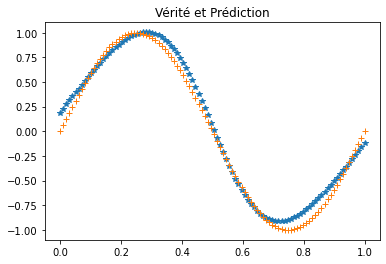

In [15]:
plt.figure()
plt.plot(X[0],y_pred[0], '*', label= "Prediction")
plt.plot(X[0],y[0],'+', label="Verité" )
plt.title('Vérité et Prédiction')
plt.show()

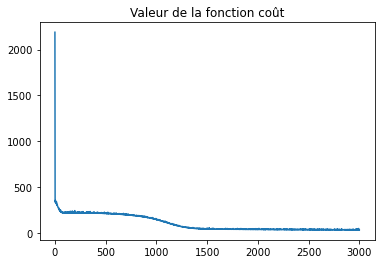

In [16]:
plt.figure()
plt.plot(Cost)
plt.title('Valeur de la fonction coût')
plt.show()